# This notebook will be used for my Coursera IBM Data Science Capstone Project

In [1]:
import pandas as pd
import numpy as np

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


## Introduction/Business Problem 

From January 1, 2004 thru May 20, 2020, the Seattle Police Department (SDP) has recorded more than 194,000 traffic collisions, classifying incidents as either “Property Damage Only Collison” (Severity Code 1) or “Injury Collision” (Severity Code 2). The SDP has hired our firm to help predict accident severity (probability) based on human observable and/or controllable factors. The SDP will utilize our findings to develop public service announcements to educate drivers of the risks of driving during certain observable/controllable conditions.

## Data

The dataset we will be utilizing was provided by the Seattle Police Department and contains 194,673 records with 37 attributes, with the date range of January 01, 2004 thru May 2020, 2020. The data will be used to train and test (supervised) a machine learning model to predict accident severity, “Property Damage Only” Severity Code 1 or “Injury Collision” Severity Code 2.

### Load required libraries:

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load Dataset

In [4]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.shape

(194673, 38)

## Exploratory data analysis and visualization + pre-processing

### Prepping Data

### Evaluate for missing data

In [6]:
missing_data = df.isnull()
missing_data.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


### Count missing values

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

### Deal with missing data

In [8]:
# For binary attributes (INATTENTIONIND, UNDERINFL, & SPEEDING) replace NAN values with a negative value N
df['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)
df['UNDERINFL'].replace(np.nan, 'N', inplace=True)
df['SPEEDING'].replace(np.nan, 'N', inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [9]:
# For categorical attributes (WEATHER, ROADCOND, & LIGHTCOND) replace NAN values with Unknown

df['UNDERINFL'].replace('1', 'Y', inplace=True)
df['UNDERINFL'].replace('0', 'N', inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [9]:
# Further data cleanup

df['WEATHER'].replace(np.nan, 'Unknown', inplace=True)
df['ROADCOND'].replace(np.nan, 'Unknown', inplace=True)
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace=True)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


In [10]:
# Checking values
for feature in ['INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    print(df[feature].unique())

['N' 'Y']
['N' '0' '1' 'Y']
['N' 'Y']
['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' 'Unknown'
 'Dusk' 'Dawn' 'Dark - Street Lights Off' 'Other'
 'Dark - Unknown Lighting']


### Convert to date time object

In [11]:
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N


### Add day of the week

In [12]:
df['DAYOFWEEK'] = df['INCDATE'].dt.dayofweek
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,DAYOFWEEK
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Daylight,NaN,NaN,N,10,Entering at angle,0,0,N,2
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Dark - Street Lights On,NaN,6354039.0,N,11,From same direction - both going straight - bo...,0,0,N,2
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Daylight,NaN,4323031.0,N,32,One parked--one moving,0,0,N,3
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Daylight,NaN,NaN,N,23,From same direction - all others,0,0,N,4
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Daylight,NaN,4028032.0,N,10,Entering at angle,0,0,N,2


### Type Check

In [13]:
df.dtypes

SEVERITYCODE                    int64
X                             float64
Y                             float64
OBJECTID                        int64
INCKEY                          int64
COLDETKEY                       int64
REPORTNO                       object
STATUS                         object
ADDRTYPE                       object
INTKEY                        float64
LOCATION                       object
EXCEPTRSNCODE                  object
EXCEPTRSNDESC                  object
SEVERITYCODE.1                  int64
SEVERITYDESC                   object
COLLISIONTYPE                  object
PERSONCOUNT                     int64
PEDCOUNT                        int64
PEDCYLCOUNT                     int64
VEHCOUNT                        int64
INCDATE           datetime64[ns, UTC]
INCDTTM                        object
JUNCTIONTYPE                   object
SDOT_COLCODE                    int64
SDOT_COLDESC                   object
INATTENTIONIND                 object
UNDERINFL   

### Create new data frame for columns that are within the scope of "human observable and/or controllable factors"

In [14]:
df_scope = df[['SEVERITYCODE', 'SEVERITYDESC', 'INCDATE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND','SPEEDING','DAYOFWEEK']]

df_scope.head()

,SEVERITYCODE,SEVERITYDESC,INCDATE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,DAYOFWEEK
0,2,Injury Collision,2013-03-27 00:00:00+00:00,N,N,Overcast,Wet,Daylight,N,2
1,1,Property Damage Only Collision,2006-12-20 00:00:00+00:00,N,0,Raining,Wet,Dark - Street Lights On,N,2
2,1,Property Damage Only Collision,2004-11-18 00:00:00+00:00,N,0,Overcast,Dry,Daylight,N,3
3,1,Property Damage Only Collision,2013-03-29 00:00:00+00:00,N,N,Clear,Dry,Daylight,N,4
4,2,Injury Collision,2004-01-28 00:00:00+00:00,N,0,Raining,Wet,Daylight,N,2


In [15]:
df_scope['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

### There are 58,188 severity 2 accidents

### Plot columns to better understand the data:

In [ ]:
!conda install -c anaconda seaborn -y

### Collision Counts

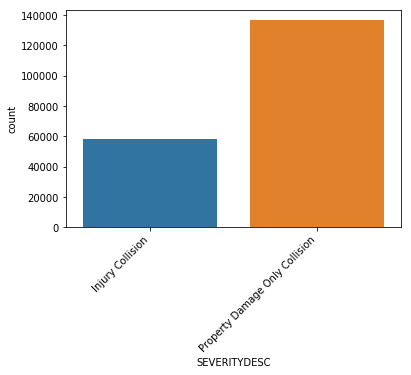

In [16]:
import seaborn as sns
ax = sns.countplot(df_scope['SEVERITYDESC'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

### Collision Count by Day of the Week

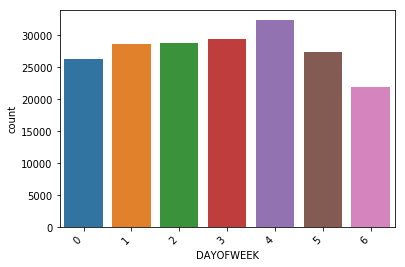

In [17]:
ax = sns.countplot(df['DAYOFWEEK'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

In [86]:
df_scope['DAYOFWEEK'].value_counts()

4    32333
3    29324
2    28778
1    28556
5    27389
0    26338
6    21955
Name: DAYOFWEEK, dtype: int64

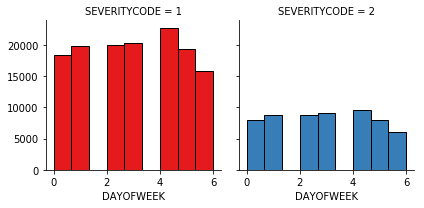

In [18]:
bins = np.linspace(df_scope.DAYOFWEEK.min(), df_scope.DAYOFWEEK.max(), 10)
g = sns.FacetGrid(df_scope, col="SEVERITYCODE", hue="SEVERITYCODE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'DAYOFWEEK', bins=bins, ec="k")

plt.show()

### It appears that most accidents happen on the 5th day of the week, which is Friday.

### Collision Counts by Attributes

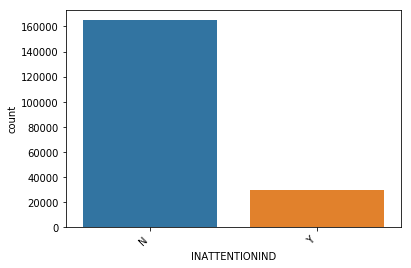

In [19]:
#INATTENTIONIND
ax = sns.countplot(df_scope['INATTENTIONIND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

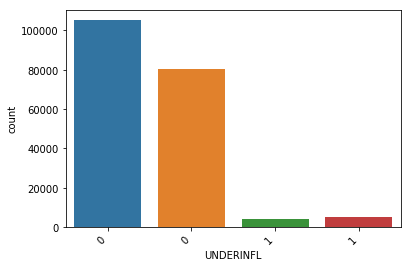

In [85]:
#UNDERINFL
ax = sns.countplot(df_scope['UNDERINFL'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

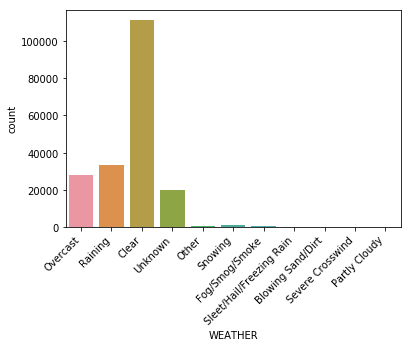

In [21]:
#WEATHER
ax = sns.countplot(df_scope['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

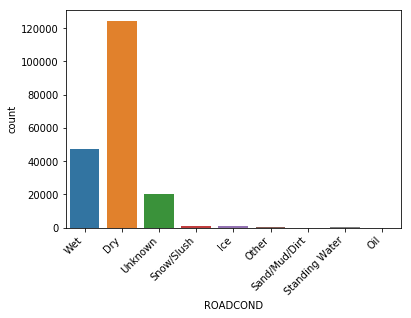

In [22]:
#ROADCOND
ax = sns.countplot(df_scope['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

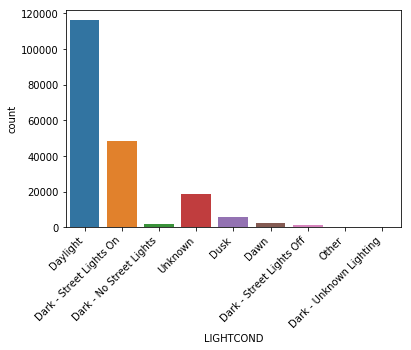

In [23]:
#LIGHTCOND
ax = sns.countplot(df_scope['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

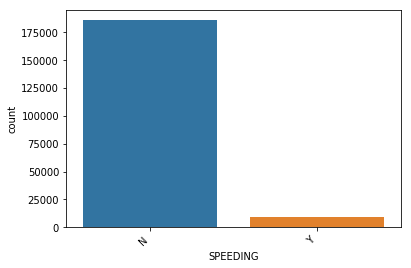

In [24]:
#SPEEDING
ax = sns.countplot(df_scope['SPEEDING'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

## Convert Categorical features to numerical values

### Lets look at day of the week:

In [92]:
df_scope.groupby(['SEVERITYDESC'])['DAYOFWEEK'].value_counts(normalize=False)

SEVERITYDESC                    DAYOFWEEK
Injury Collision                4             9559
                                3             9018
                                2             8757
                                1             8731
                                5             8047
                                0             7973
                                6             6103
Property Damage Only Collision  4            22774
                                3            20306
                                2            20021
                                1            19825
                                5            19342
                                0            18365
                                6            15852
Name: DAYOFWEEK, dtype: int64

In [90]:
df_scope.groupby(['SEVERITYDESC'])['DAYOFWEEK'].value_counts(normalize=True)

SEVERITYDESC                    DAYOFWEEK
Injury Collision                4            0.164278
                                3            0.154980
                                2            0.150495
                                1            0.150048
                                5            0.138293
                                0            0.137021
                                6            0.104884
Property Damage Only Collision  4            0.166861
                                3            0.148778
                                2            0.146690
                                1            0.145254
                                5            0.141715
                                0            0.134557
                                6            0.116145
Name: DAYOFWEEK, dtype: float64

16.4% of Injury Collisions and only 16.7% of Property Damage Only Collisions happen on Friday (Day of the Week #4 = Friday)

### Lets look at speeding:

In [26]:
df.groupby(['SEVERITYDESC'])['SPEEDING'].value_counts(normalize=True)

SEVERITYDESC                    SPEEDING
Injury Collision                N           0.939317
                                Y           0.060683
Property Damage Only Collision  N           0.957490
                                Y           0.042510
Name: SPEEDING, dtype: float64

It doesn't look like speeding dramatically increases the chance of an injury collision

## One Hot Encoding

Convert categorical variables to binary variables and append them to the feature data frame

Due to system limitations, the following attributes will not be included in this model:
* ROADCOND
* WEATHER
* LIGHTCOND

These attributes will be utlized in feature models

In [27]:
df_scope['INATTENTIONIND'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
df_scope['UNDERINFL'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)
df_scope['SPEEDING'].replace(to_replace=['Y','N'], value=[1,0],inplace=True)

df_scope.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,SEVERITYDESC,INCDATE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,DAYOFWEEK
0,2,Injury Collision,2013-03-27 00:00:00+00:00,0,0,Overcast,Wet,Daylight,0,2
1,1,Property Damage Only Collision,2006-12-20 00:00:00+00:00,0,0,Raining,Wet,Dark - Street Lights On,0,2
2,1,Property Damage Only Collision,2004-11-18 00:00:00+00:00,0,0,Overcast,Dry,Daylight,0,3
3,1,Property Damage Only Collision,2013-03-29 00:00:00+00:00,0,0,Clear,Dry,Daylight,0,4
4,2,Injury Collision,2004-01-28 00:00:00+00:00,0,0,Raining,Wet,Daylight,0,2


In [31]:
feature = df_scope[['SEVERITYCODE','INATTENTIONIND','UNDERINFL','SPEEDING']]
feature = pd.concat([feature,pd.get_dummies(df_scope['DAYOFWEEK'])], axis=1)
feature.head()

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,0,1,2,3,4,5,6
0,2,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Will test in future
#feature = pd.concat([feature,pd.get_dummies(df_scope['ROADCOND'])], axis=1)
#feature.head()

In [ ]:
# Will test in future
#feature = pd.concat([feature,pd.get_dummies(df_scope['WEATHER'])],
#          axis=1)
#feature.head()

In [ ]:
# Will test in future
#feature = pd.concat([feature,pd.get_dummies(df_scope['LIGHTCOND'])], axis=1)
#feature.head()

### Feature selection

In [32]:
X = feature
X[0:5]

,SEVERITYCODE,INATTENTIONIND,UNDERINFL,SPEEDING,0,1,2,3,4,5,6
0,2,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0
4,2,0,0,0,0,0,1,0,0,0,0


In [33]:
y = df_scope['SEVERITYDESC'].values
y[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

### Normalize Data

In [34]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64, object were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 1.53153084, -0.42518348, -0.2217116 , -0.22440165, -0.39555255,
        -0.41461179,  2.40096785, -0.4211248 , -0.44628288, -0.40463262,
        -0.35653151],
       [-0.65294147, -0.42518348, -0.2217116 , -0.22440165, -0.39555255,
        -0.41461179,  2.40096785, -0.4211248 , -0.44628288, -0.40463262,
        -0.35653151],
       [-0.65294147, -0.42518348, -0.2217116 , -0.22440165, -0.39555255,
        -0.41461179, -0.41649871,  2.37459299, -0.44628288, -0.40463262,
        -0.35653151],
       [-0.65294147, -0.42518348, -0.2217116 , -0.22440165, -0.39555255,
        -0.41461179, -0.41649871, -0.4211248 ,  2.24073124, -0.40463262,
        -0.35653151],
       [ 1.53153084, -0.42518348, -0.2217116 , -0.22440165, -0.39555255,
        -0.41461179,  2.40096785, -0.4211248 , -0.44628288, -0.40463262,
        -0.35653151]])

## Classification

Utlization of the training set to build an accurate model. 

Then utilizing the test set to report the accuracy of the model. 

The following algorithms will be utlized:

* K Nearest Neighbor(KNN)
* Decision Tree
* Support Vector Machine
* Logistic Regression

### K Nearest Neighbor(KNN)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 11) (155738,)
Test set: (38935, 11) (38935,)


In [36]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Injury Collision',
       'Injury Collision'], dtype=object)

In [37]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9999743158381385
Test set Accuracy:  0.9999743161679723


### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# create an instance of the DecisionTreeClassifier called severityTree
severityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
# training
severityTree.fit(X_train,y_train)
severityTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
predTree = severityTree.predict(X_test)

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  1.0


### Support Vector Machine

In [61]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [62]:
yhat = clf.predict(X_test)
yhat [0:5]

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', 'Injury Collision',
       'Injury Collision'], dtype=object)

In [63]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

1.0

In [64]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [66]:
yhat = LR.predict(X_test)
yhat

array(['Injury Collision', 'Property Damage Only Collision',
       'Property Damage Only Collision', ...,
       'Property Damage Only Collision', 'Property Damage Only Collision',
       'Injury Collision'], dtype=object)

In [67]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

1.0

## Model Evaluation using Test set

In [79]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

## KNN

In [80]:
# predicted y
yhat_knn = neigh.predict(X_test)

# jaccard
jaccard_knn = jaccard_similarity_score(y_test, yhat_knn)
print("KNN Jaccard index: ", jaccard_knn)

# f1_score
f1_score_knn = f1_score(y_test, yhat_knn, average='weighted')
print("KNN F1-score: ", f1_score_knn)

KNN Jaccard index:  1.0
KNN F1-score:  1.0


## Decision Tree

In [81]:
# predicted y
yhat_dt = loanTree.predict(X_test)

# jaccard
jaccard_dt = jaccard_similarity_score(y_test, yhat_dt)
print("DT Jaccard index: ", jaccard_dt)

# f1_score
f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("DT F1-score: ", f1_score_dt)


#drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#drugTree # it shows the default parameters
#drugTree.fit(X_trainset,y_trainset)
#predTree = drugTree.predict(X_testset)

DT Jaccard index:  1.0
DT F1-score:  1.0


## SVM

In [82]:
# predicted y
yhat_svm = clf.predict(X_test)

# jaccard
jaccard_svm = jaccard_similarity_score(y_test, yhat_svm)
print("SVM Jaccard index: ", jaccard_svm)

# f1_score
f1_score_svm = f1_score(y_test, yhat_svm, average='weighted')
print("SVM F1-score: ", f1_score_svm)

SVM Jaccard index:  1.0
SVM F1-score:  1.0


## Logistic Regression

In [83]:
# predicted y
yhat_lg = LR.predict(X_test)
yhat_lg_prob = LR.predict_proba(X_test)

# jaccard
jaccard_lg = jaccard_similarity_score(y_test, yhat_lg)
print("LR Jaccard index: ", jaccard_lg)

# f1_score
f1_score_lg = f1_score(y_test, yhat_lg, average='weighted')
print("LR F1-score: ", f1_score_lg)

# logloss
logloss_lg = log_loss(y_test, yhat_lg_prob)
print("LR log loss: ", logloss_lg)

LR Jaccard index:  1.0
LR F1-score:  1.0
LR log loss:  0.003615055576713658


# Report

Accuracy of models:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 1.0     | 1.0      | N/A     |
| Decision Tree      | 1.0     | 1.0      | N/A     |
| SVM                | 1.0     | 1.0      | N/A     |
| LogisticRegression | 1.0     | 1.0      | 0.0036  |

## Model Conclusion

It appears that any of the four classification algorithms, with the selected attributes, can be utlized to make an accurate prediction of collision severity.